## Modeling Uncertainty

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print("performance: %.3f ± %.3f" % (scores.mean(),scores.std()))
Udata = scores.std()

[0.84666667 0.86       0.85333333 0.84666667 0.88666667]
performance: 0.859 ± 0.015


In [8]:
# Uncertainty in the model
import numpy as np
import random  
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#we use the same data as before
#X, y = make_classification(n_samples=1000,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

random.seed(1)

lAcc = []
for _ in range(5):
    model = DecisionTreeClassifier(random_state=random.randrange(100))
    model.fit(X_train, y_train)
    lAcc += [accuracy_score(y_test, model.predict(X_test))]

print(lAcc)
print("performance: %.3f ± %.3f" % (np.mean(lAcc),np.std(lAcc)))
Umodel = np.std(lAcc)

[0.852, 0.828, 0.824, 0.856, 0.852]
performance: 0.842 ± 0.014


In [10]:
print("Uncertainty in the data: %.3f" % Udata)
print("Uncertainty in the model: %.3f" % Umodel)
# we used the model performance from the second part, because it was trained on the full test_set
print("rather: The model performance is %.3f ± %.3f ± %.3f" % (np.mean(lAcc),Udata,Umodel))

Uncertainty in the data: 0.015
Uncertainty in the model: 0.014
rather: The model performance is 0.842 ± 0.015 ± 0.014


In [4]:
# total uncertainty
Utot = np.sqrt(Udata**2 + Umodel**2)
print("The model performance is %.3f ± %.3f" % (scores.mean(),Utot))

The model performance is 0.862 ± 0.027


# Training set size optimizer

In [5]:
# --->>> Your Turn <<<---
# Write a function that plots the uncertainty of the performance due to the data
# versus the size of the test set.

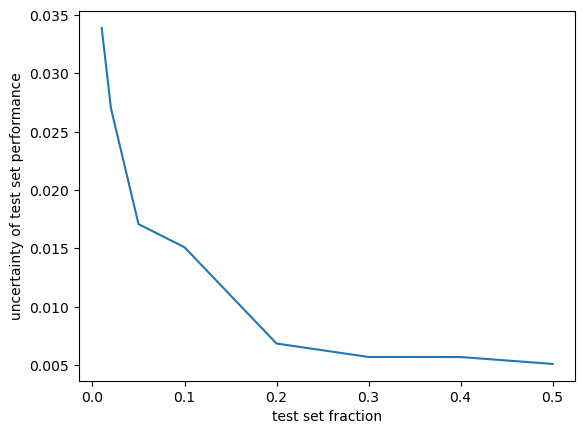

In [12]:
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

random.seed(42)

X, y = make_classification(n_samples=5000,random_state=42)

ltest_frac = [0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5]
lUdata = []
mUdata = []
for test_frac in ltest_frac:
    lAcc = []
    for _ in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac)
        model = DecisionTreeClassifier(random_state=random.randrange(100))
        # model = RandomForestClassifier(random_state=random.randrange(100)) # Random Forests tend to have lower uncertainty but are more computationally expensive
        model.fit(X_train, y_train)
        lAcc += [accuracy_score(y_test, model.predict(X_test))] 
    #print(lAcc)
    lUdata.append(np.std(lAcc))
    mUdata.append(np.mean(lAcc))
plt.plot(ltest_frac,lUdata)
plt.xlabel("test set fraction")
plt.ylabel("uncertainty of test set performance");

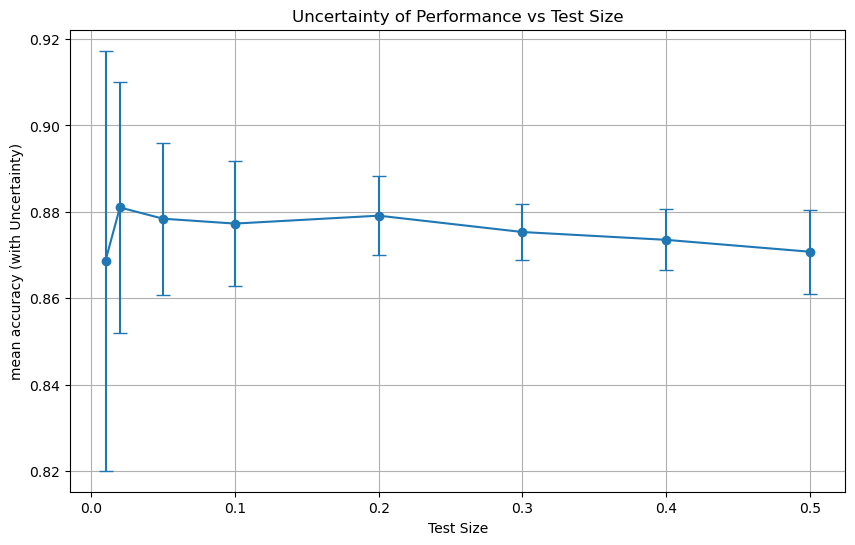

In [11]:
plt.figure(figsize=(10, 6))
plt.errorbar(ltest_frac, mUdata, yerr=lUdata, fmt='-o', capsize=5)
plt.xlabel('Test Size')
plt.ylabel('mean accuracy (with Uncertainty)')
plt.title('Uncertainty of Performance vs Test Size')
plt.grid(True)
plt.show()

In [8]:
# This function estimates how big your test set has to be 
# to achieve a given target uncertainty.
#
# Utarget = desired accuracy of model performance on the test set

import numpy as np
def training_size_optimizer(model,X,y, Utarget):
    # initial train_frac = 70%
    test_frac = 0.3
    
    lAcc = []
    for _ in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac)  
        model = DecisionTreeClassifier(random_state=random.randrange(100))
        model.fit(X_train, y_train)
        lAcc += [accuracy_score(y_test, model.predict(X_test))] 
            
    Udata = np.std(lAcc)
    print("uncertainty for train_frac=0.7: %.3f" % Udata)
    test_frac_new = test_frac * ( Udata / Utarget )**2
    if test_frac_new>1:
        print("Warning: The data set is not sufficiently large to achieve the desired measurement uncertainty!")
    train_frac_new = 1 - test_frac_new
    print("predicted train_frac for Udata=%.3f : %.3f" % (Utarget,train_frac_new))

In [9]:
# Let's try out our training size optimizer:
X, y = make_classification(n_samples=1000,random_state=42)

model = DecisionTreeClassifier(random_state=42)

training_size_optimizer(model,X,y, 0.03)

uncertainty for train_frac=0.7: 0.018
predicted train_frac for Udata=0.030 : 0.889
